In [1]:
import pandas as pd

In [2]:
#Mount on drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth/

/content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth


### Read Political - Non Political Tweet Dataset ###

In [4]:
data = pd.read_csv('pol_nonpol_tweets.txt',sep="\t", header=None, on_bad_lines='skip')
data.columns = ["label", "tweet"]

In [5]:
data.head()

,label,tweet
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...
1,POLIT,Do the Conservatives Have a Death Wish? http:/...
2,NOT,@MMFlint I've seen all of your movies and Capi...
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...


In [6]:
data['label'].value_counts()

POLIT    1691
NOT       313
Name: label, dtype: int64

In [38]:
(1691-313)

1378

### Adding more NOT political tweets to balance out the Dataset ###


In [14]:
import chardet
def encode_check(f):
    """
    Helper function to check encoding of incoming csv file
    """

    file = open(f, "rb").read(10000)
    a = chardet.detect(file)
    return a['encoding']


In [39]:
df = pd.read_csv('avengers_random.csv', encoding=encode_check('avengers_random.csv'))

In [40]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


In [41]:
df = df[['text','created']]
df.head()

,text,created
0,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,2019-04-23 10:43:30
1,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",2019-04-23 10:43:30
2,saving these bingo cards for tomorrow \r\n©\r\...,2019-04-23 10:43:30
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:29
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",2019-04-23 10:43:29


In [42]:
df.shape

(15000, 2)

In [43]:
df1 = pd.read_csv('customer_random.csv', encoding=encode_check('customer_random.csv'))
df1.shape

(2811774, 7)

In [44]:
df1.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [45]:
df1 = df1[['text','created_at']]
df1.rename({'created_at': 'created'}, axis=1, inplace=True)
df1.head()

,text,created
0,@115712 I understand. I would like to assist y...,Tue Oct 31 22:10:47 +0000 2017
1,@sprintcare and how do you propose we do that,Tue Oct 31 22:11:45 +0000 2017
2,@sprintcare I have sent several private messag...,Tue Oct 31 22:08:27 +0000 2017
3,@115712 Please send us a Private Message so th...,Tue Oct 31 21:54:49 +0000 2017
4,@sprintcare I did.,Tue Oct 31 21:49:35 +0000 2017


In [46]:
# With a given seed, the sample will always draw the same rows.
# If random_state is None or np.random,
# then a randomly-initialized
# RandomState object is returned.
random1 = df.sample(n = 689, random_state = 2)
random2 = df1.sample(n=689,random_state=2)

In [47]:
#Concatenate the random samples together
random_concat = pd.concat([random1,random2])
random_concat.shape

(1378, 2)

In [48]:
random_concat.head()

,text,created
7592,RT @tomatoesis: SCARLETT THO OMG SKSKSKSKSS #A...,2019-04-23 10:02:28
3551,"RT @Marvel: Black Widow herself, Scarlett Joha...",2019-04-23 10:24:29
9698,RT @Breznican: #AvengersEndgame just ended. No...,2019-04-23 09:52:11
3759,I heard that Chris Evans cried 6 times uh oh t...,2019-04-23 10:23:24
2353,RT @Marvel: What a (Captain) Marvel. @brielars...,2019-04-23 10:30:52


In [49]:
random_concat['label'] = 'NOT'

In [50]:
random_concat.head()

,text,created,label
7592,RT @tomatoesis: SCARLETT THO OMG SKSKSKSKSS #A...,2019-04-23 10:02:28,NOT
3551,"RT @Marvel: Black Widow herself, Scarlett Joha...",2019-04-23 10:24:29,NOT
9698,RT @Breznican: #AvengersEndgame just ended. No...,2019-04-23 09:52:11,NOT
3759,I heard that Chris Evans cried 6 times uh oh t...,2019-04-23 10:23:24,NOT
2353,RT @Marvel: What a (Captain) Marvel. @brielars...,2019-04-23 10:30:52,NOT


In [51]:
random_concat = random_concat.drop('created', 1)

<ipython-input-51-2c4d6ef409e1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  random_concat = random_concat.drop('created', 1)


In [52]:
random_concat.head()

,text,label
7592,RT @tomatoesis: SCARLETT THO OMG SKSKSKSKSS #A...,NOT
3551,"RT @Marvel: Black Widow herself, Scarlett Joha...",NOT
9698,RT @Breznican: #AvengersEndgame just ended. No...,NOT
3759,I heard that Chris Evans cried 6 times uh oh t...,NOT
2353,RT @Marvel: What a (Captain) Marvel. @brielars...,NOT


In [53]:
### Concatenate this with our existing not dataset
not_dataset = data[data['label']=='NOT']
not_dataset.head()

,label,tweet
2,NOT,@MMFlint I've seen all of your movies and Capi...
5,NOT,"@DeeptiLamba LOL, I like quotes. Feminist, ant..."
14,NOT,From CTIA: The rise of open mobile (and congra...
15,NOT,RT @pauldramos: RT @pauldramos: RT @Carivintas...
18,NOT,"@MMFlint Have a good time mike ,Capitalism ! W..."


In [54]:
random_concat.rename({'text': 'tweet'}, axis=1, inplace=True)

In [55]:
#Concatenate the NOT samples together
aug_not = pd.concat([random_concat,not_dataset])

In [56]:
aug_not.head()

,tweet,label
7592,RT @tomatoesis: SCARLETT THO OMG SKSKSKSKSS #A...,NOT
3551,"RT @Marvel: Black Widow herself, Scarlett Joha...",NOT
9698,RT @Breznican: #AvengersEndgame just ended. No...,NOT
3759,I heard that Chris Evans cried 6 times uh oh t...,NOT
2353,RT @Marvel: What a (Captain) Marvel. @brielars...,NOT


In [57]:
aug_not.shape

(1691, 2)

In [58]:
pol_dataset = data[data['label']=='POLIT']
pol_dataset.head()

,label,tweet
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...
1,POLIT,Do the Conservatives Have a Death Wish? http:/...
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...
6,POLIT,@mystic23 I also think that most liberals don'...


In [59]:
pol_dataset.shape

(1691, 2)

In [60]:
#combine both datasets together to get the final augmented dataset
aug = pd.concat([pol_dataset,aug_not])
aug.shape

(3382, 2)

In [61]:
aug.head()

,label,tweet
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...
1,POLIT,Do the Conservatives Have a Death Wish? http:/...
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...
6,POLIT,@mystic23 I also think that most liberals don'...


In [62]:
import numpy as np
aug['bin_label'] = np.where(aug['label']=='POLIT', 1, 0)

In [63]:
aug = aug.reset_index(drop=True)

In [64]:
aug.to_csv("CSA_2024/augmented_pol_nonpol_tweets.csv")

### Train - Test Split ###

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(aug['tweet'],aug['bin_label'])

In [66]:
print("train", X_train.shape)
print("test", X_test.shape)

train (2536,)
test (846,)


### Model Training ###

In [67]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.3 MB/s eta 0:00:00


In [68]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [69]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [72]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [73]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [74]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=100, batch_size=32)

Epoch 1/100
72/72 [==============================] - 48s 453ms/step - loss: 0.6652 - accuracy: 0.6017 - precision: 0.5986 - recall: 0.5981 - val_loss: 0.6309 - val_accuracy: 0.6575 - val_precision: 0.7429 - val_recall: 0.4298
Epoch 2/100
72/72 [==============================] - 29s 408ms/step - loss: 0.5934 - accuracy: 0.7191 - precision: 0.7267 - recall: 0.6952 - val_loss: 0.5900 - val_accuracy: 0.7047 - val_precision: 0.6983 - val_recall: 0.6694
Epoch 3/100
72/72 [==============================] - 30s 419ms/step - loss: 0.5472 - accuracy: 0.7642 - precision: 0.7818 - recall: 0.7279 - val_loss: 0.5596 - val_accuracy: 0.7441 - val_precision: 0.7373 - val_recall: 0.7190
Epoch 4/100
72/72 [==============================] - 29s 404ms/step - loss: 0.5169 - accuracy: 0.7993 - precision: 0.8155 - recall: 0.7694 - val_loss: 0.5570 - val_accuracy: 0.7480 - val_precision: 0.6939 - val_recall: 0.8430
Epoch 5/100
72/72 [==============================] - 26s 366ms/step - loss: 0.4882 - accuracy: 0

In [75]:
import matplotlib.pyplot as plt

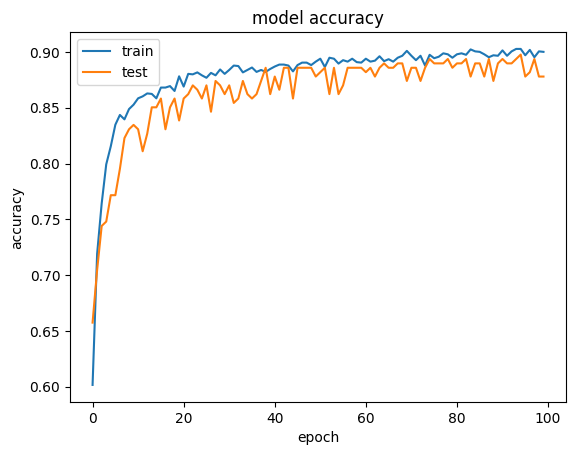

In [76]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

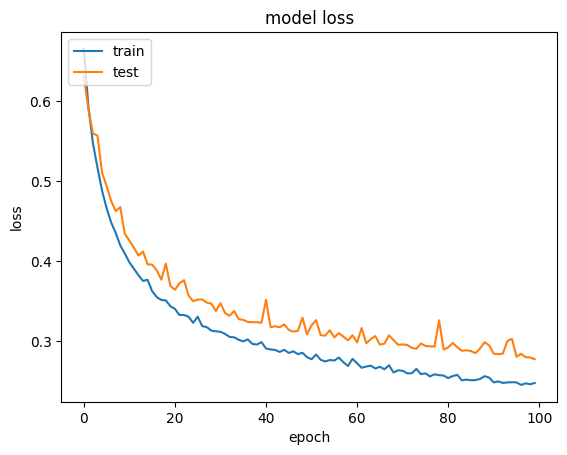

In [77]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

27/27 [==============================] - 9s 321ms/step


In [79]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
#y_predicted

In [80]:
y_orig = y_test.to_numpy()
#y_orig

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_orig, y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       408
           1       0.88      0.87      0.88       438

    accuracy                           0.88       846
   macro avg       0.88      0.88      0.88       846
weighted avg       0.88      0.88      0.88       846



In [83]:
model.save_weights("CSA_2024/pretrained_weights.h5")

# Sample out some test samples for validation #

In [84]:
# Combine X_test and y_test into a DataFrame for easy sampling
test_df = pd.DataFrame({
    'tweet': X_test,
    'label': y_test
})

# Randomly sample a specified number of samples for human validation
# Adjust n=10 to the number of samples you wish to sample
sampled_test_df = test_df.sample(n=100, random_state=42) # random_state for reproducibility

# Display the sampled test data
sampled_test_df.head()

,tweet,label
1292,"Congress understands. said ""outragious"" people...",1
1813,RT @caplovesfondue: Chris Evans brought his WH...,0
373,@SupportGreenIRN not a republican. Reformed de...,1
2787,"@AmazonHelp Yes, still waiting on a current or...",0
1336,@rascottdotcom french vici government collabor...,1


In [85]:
sampled_test_df.to_csv('CSA_2024/P_NP_val_data.csv', index= False, header = True)

### Load the model

In [ ]:
import keras

In [ ]:
#Create the older model
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
load_model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
#load weights
load_model.load_weights('CSA_2024/pretrained_weights.h5')

In [ ]:
y_predicted = load_model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = load_model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
print(classification_report(y_orig, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       417
           1       0.89      0.93      0.91       429

    accuracy                           0.91       846
   macro avg       0.91      0.91      0.91       846
weighted avg       0.91      0.91      0.91       846



### Mount drive and read in the user historical tweets folder, and run the model on the cases

In [ ]:
import pandas as pd
import glob
import numpy as np
import operator
import csv

In [ ]:
#Mount on drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth/

/content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth


In [ ]:
%pwd

'/content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth'

### For the model that is for training ##

In [ ]:
user_history_path = "User_historical_tweets/"

In [ ]:
files_in_dir = glob.glob(user_history_path+'*.txt')
print(len(files_in_dir))

10762


In [ ]:
present_user = files_in_dir[0].split("/")[1][:-4]
present_user

'564150644'

In [ ]:
#files_in_dir = glob.glob(user_history_path+'*.txt')
N = 10
ifile_count = 0
with open("most_pol_user_history.csv", 'w',encoding='utf-8',newline='') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(['user_id','user_history'])

  for ifile in files_in_dir:
    if ifile_count%1000 == 0:
      print("count written ==>", ifile_count)
    tweet_info = []
    user_id = ifile.split("/")[1][:-4]
    tweet_info.append(user_id)
    #ifile = user_history_path+"240854263.txt"
    with open(ifile) as f:
        lines = f.read().splitlines()
    #print(len(lines))

    #Go call the trained model for each sentence in the line
    tweet_probs = []
    y_predicted = load_model.predict(lines)
    y_predicted = y_predicted.flatten()

    enumerate_object = enumerate(y_predicted)
    sorted_pairs = sorted(enumerate_object, key=operator.itemgetter(1))
    #get most political 10 tweets
    res = sorted_pairs[-N:]
    most_political = []
    for tup in res:
      most_political.append(lines[tup[0]])
    tweets_10 = '|'.join(most_political)
    tweet_info.append(tweets_10)
    csvwriter.writerow(tweet_info)
    ifile_count+=1
print("Written to file -->","most_pol_user_history.csv")

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 1s 196ms/step
count written ==> 6000
6/6 [==============================] - 1s 193ms/step
count written ==> 7000
6/6 [==============================] - 1s 197ms/step
count written ==> 8000
7/7 [==============================] - 1s 195ms/step
count written ==> 9000
9/9 [==============================] - 2s 197ms/step
count written ==> 10000
9/9 [==============================] - 2s 192ms/step
Written to file --> most_pol_user_history.csv


In [ ]:
write_path = '/content/gdrive/MyDrive/UMN_CS_PhD/RA/Datasets for JOUR8500/GroundTruth/most_pol_user_history_1.csv'
with open(write_path, 'w', newline='') as file:
  writer = csv.writer(file)
  with open('most_pol_user_history.csv', 'r') as file:
      reader = csv.reader(file)
      for row in reader:
          writer.writerow(row)
print("wrote out of session in right location")

wrote out of session in right location


In [ ]:
### Test code ###

In [ ]:

enumerate_object = enumerate(y_predicted)
sorted_pairs = sorted(enumerate_object, key=operator.itemgetter(1))
N = 10
#get most political 10 tweets
res = sorted_pairs[-N:]
most_political = []
for tup in res:
  most_political.append(lines[tup[0]])
print(most_political)

['Your last saved celebrity picture is your therapist - so who is it? ', 'RT @RexChapman: So — this teacher taught “Thriller” to her students. They killed it.', '@JudgeRoberson I’m having flashbacks to our mock trial case. LOL', 'RT @AstroKatie: Depressing to see Covid denial follow exactly the same trajectory as climate denial:', 'RT @Mikel_Jollett: Told my niece the delta variant was as contagious as chicken pox and she said, "What\'s chicken pox?"', 'RT @ProjectLincoln: Retweet if you think Ted Cruz and Josh Hawley should resign immediately.', '10% of anything I earn from readings in June &amp; July will be donated to t…', "RT @sabfreeman13: Dolly Parton didn't spend her millions on space travel.  She spent it putting 150M books in the hands of children.", 'RT @ChrisMurphyCT: Driving home tonight, I thought about Republicans\' floor speeches today on the "sanctity of life".', 'And how this concern…']


In [ ]:
print(sorted_pairs)

[(16, 0.012686422), (26, 0.012686422), (33, 0.012686422), (36, 0.012686422), (43, 0.012686422), (48, 0.012686422), (71, 0.012686422), (74, 0.012686422), (138, 0.012686422), (148, 0.012686422), (160, 0.012686422), (196, 0.012686422), (201, 0.012686422), (227, 0.012686535), (179, 0.0156602), (223, 0.024203923), (106, 0.025182312), (217, 0.030113544), (96, 0.030968253), (190, 0.03530604), (93, 0.036665946), (86, 0.03733567), (134, 0.037369825), (225, 0.037512768), (182, 0.039342776), (20, 0.04125585), (222, 0.043577682), (95, 0.045568787), (108, 0.045683138), (187, 0.04850301), (69, 0.049212586), (199, 0.051898517), (103, 0.05295465), (215, 0.053304203), (141, 0.054890633), (167, 0.054898378), (175, 0.05550774), (127, 0.055840485), (14, 0.05622796), (49, 0.05657549), (19, 0.057050973), (61, 0.0591248), (77, 0.05923255), (172, 0.059730384), (24, 0.060800336), (124, 0.06161878), (17, 0.06344474), (18, 0.06344474), (27, 0.06344474), (28, 0.06344474), (29, 0.06344474), (30, 0.06344474), (75, 

In [ ]:
tweets_10 = '|'.join(most_political)

In [ ]:
tweets_10

'Your last saved celebrity picture is your therapist - so who is it? |RT @RexChapman: So — this teacher taught “Thriller” to her students. They killed it.|@JudgeRoberson I’m having flashbacks to our mock trial case. LOL|RT @AstroKatie: Depressing to see Covid denial follow exactly the same trajectory as climate denial:|RT @Mikel_Jollett: Told my niece the delta variant was as contagious as chicken pox and she said, "What\'s chicken pox?"|RT @ProjectLincoln: Retweet if you think Ted Cruz and Josh Hawley should resign immediately.|10% of anything I earn from readings in June &amp; July will be donated to t…|RT @sabfreeman13: Dolly Parton didn\'t spend her millions on space travel.  She spent it putting 150M books in the hands of children.|RT @ChrisMurphyCT: Driving home tonight, I thought about Republicans\' floor speeches today on the "sanctity of life".|And how this concern…'

### For the model to be tested ###

In [ ]:
user_history_path = "CSA_User_History/"

In [ ]:
files_in_dir = glob.glob(user_history_path+'*.txt')
print(len(files_in_dir))

In [ ]:
present_user = files_in_dir[0].split("/")[1][:-4]
present_user

In [ ]:
# Read each of the JSON objects in the folder, extract the tweet and apply the loaded model on the tweet!
N = 10
ifile_count = 0
error_list = []

with open("most_pol_user_history_CSA.csv", 'w',encoding='utf-8',newline='') as csvfile:
  csvwriter = csv.writer(csvfile)
  csvwriter.writerow(['user_id','user_history'])

  for ifile in files_in_dir:
    if ifile_count%1000 == 0:
      print("count written ==>", ifile_count) # just for progress check on write

    tweet_info = []
    tweets_list = []

    user_name = ifile.split("/")[1][:-4]

    #each file has the tweet object of the user on a newline;so read the file & load the tweet objects
    # if the file says error, couldnt get the history of that user
    with open(ifile) as f:
        lines = f.read().splitlines()
    try:
      data_python = json.loads(json.dumps(lines))
      # extract the tweet from the tweet onject into tweets_list
      for d in data_python:
        python_dict = json.loads(d)
        tweet = python_dict["full_text"]
        tweets_list.append(tweet)

      #Go call the trained model for each of the tweets in the tweetslist
      tweet_probs = []
      y_predicted = load_model.predict(tweets_list)
      y_predicted = y_predicted.flatten()
      #sort by probability of the prediction in descending order
      enumerate_object = enumerate(y_predicted)
      sorted_pairs = sorted(enumerate_object, key=operator.itemgetter(1))
      res = sorted_pairs[-N:]
      #get most political N tweets
      most_political = []
      for tup in res:
        most_political.append(tweets_list[tup[0]])
      #concatenate the political tweets with a |
      tweets_10 = '|'.join(most_political)
      #write out the tweet info
      tweet_info.append(user_name)
      tweet_info.append(tweets_10)
      csvwriter.writerow(tweet_info)
      ifile_count+=1
    except:
      print("error",user_name)
      error_list.append(user_name)
print("Written to file -->","most_pol_user_history_CSA.csv")

In [ ]:
print(len(error_list))

In [ ]:
textfile = open("CSA_error_usernames.txt", "w")
for element in error_list:
    textfile.write(element + "\n")
textfile.close()